## Imports


In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, max_error, median_absolute_error, r2_score, explained_variance_score

In [ ]:
# train.csv
train_df = pd.read_csv("https://drive.google.com/uc?id=1h-vNpZ0RJnsuLxCTs0qc80jwGNrGeX49")
train_df.head()

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


In [ ]:
# test.csv
test_df = pd.read_csv("https://drive.google.com/uc?id=1i01pfTSwINi_SBEZhZCG_oZ8C2s6zqWa")
test_df.head()

,id,date,store,item
0,0,2018-01-01,1,1
1,1,2018-01-02,1,1
2,2,2018-01-03,1,1
3,3,2018-01-04,1,1
4,4,2018-01-05,1,1


In [ ]:
# sample_submission.csv
sample_df = pd.read_csv("https://drive.google.com/uc?id=1VUhb4Jv2BbeE3jLef3vuTMhWDnf3z_JD")
sample_df.head()

,id,sales
0,0,52
1,1,52
2,2,52
3,3,52
4,4,52


Exploration

In [ ]:
train_df.store.value_counts()

1     91300
2     91300
3     91300
4     91300
5     91300
6     91300
7     91300
8     91300
9     91300
10    91300
Name: store, dtype: int64

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   store   913000 non-null  int64
 1   item    913000 non-null  int64
 2   sales   913000 non-null  int64
 3   year    913000 non-null  int64
 4   month   913000 non-null  int64
 5   day     913000 non-null  int64
dtypes: int64(6)
memory usage: 41.8 MB


In [ ]:
train_df.isnull().sum().sum()

0

In [ ]:
test_df.store.value_counts()

1     4500
2     4500
3     4500
4     4500
5     4500
6     4500
7     4500
8     4500
9     4500
10    4500
Name: store, dtype: int64

In [ ]:
test_df.isnull().sum().sum()

0

## Data Preparation

In [ ]:
# extract d,m,y for time series forecasting
# train data

import datetime as dt
train_df['date'] = pd.to_datetime(train_df['date'])

train_df['year'] = train_df['date'].dt.year
train_df['month'] = train_df['date'].dt.month
train_df['day'] = train_df['date'].dt.dayofweek

train_df.drop('date', axis=1, inplace=True)
train_df.head()

,store,item,sales,year,month,day
0,1,1,13,2013,1,1
1,1,1,11,2013,1,2
2,1,1,14,2013,1,3
3,1,1,13,2013,1,4
4,1,1,10,2013,1,5


In [ ]:
train_df.year.value_counts()

2016    183000
2013    182500
2014    182500
2015    182500
2017    182500
Name: year, dtype: int64

In [ ]:
train_df.month.value_counts()

1     77500
3     77500
5     77500
7     77500
8     77500
10    77500
12    77500
4     75000
6     75000
9     75000
11    75000
2     70500
Name: month, dtype: int64

In [ ]:
train_df.day.value_counts()

1    130500
2    130500
3    130500
4    130500
5    130500
6    130500
0    130000
Name: day, dtype: int64

In [ ]:
train_df.item.value_counts().sort_index()

1     18260
2     18260
3     18260
4     18260
5     18260
6     18260
7     18260
8     18260
9     18260
10    18260
11    18260
12    18260
13    18260
14    18260
15    18260
16    18260
17    18260
18    18260
19    18260
20    18260
21    18260
22    18260
23    18260
24    18260
25    18260
26    18260
27    18260
28    18260
29    18260
30    18260
31    18260
32    18260
33    18260
34    18260
35    18260
36    18260
37    18260
38    18260
39    18260
40    18260
41    18260
42    18260
43    18260
44    18260
45    18260
46    18260
47    18260
48    18260
49    18260
50    18260
Name: item, dtype: int64

In [ ]:
train_df.sales.value_counts().sort_index()

0        1
1        4
2       25
3       91
4      215
      ... 
208      1
209      1
210      1
214      1
231      1
Name: sales, Length: 213, dtype: int64

In [ ]:
sales = train_df.pop('sales') # extract sales col for target class
sales.head()

0    13
1    11
2    14
3    13
4    10
Name: sales, dtype: int64

In [ ]:
# extract d,m,y for time series forecasting
# test data
test_df['date'] = pd.to_datetime(test_df['date'])

test_df['year'] = test_df['date'].dt.year
test_df['month'] = test_df['date'].dt.month
test_df['day'] = test_df['date'].dt.dayofweek

test_df.drop('date', axis=1, inplace=True)
test_df.head()

,id,store,item,year,month,day
0,0,1,1,2018,1,0
1,1,1,1,2018,1,1
2,2,1,1,2018,1,2
3,3,1,1,2018,1,3
4,4,1,1,2018,1,4


In [ ]:
# drop id column before predicting
test_df.drop('id', axis=1, inplace=True)

In [ ]:
test_df.year.value_counts()

2018    45000
Name: year, dtype: int64

In [ ]:
test_df.item.value_counts().sort_index()

1     900
2     900
3     900
4     900
5     900
6     900
7     900
8     900
9     900
10    900
11    900
12    900
13    900
14    900
15    900
16    900
17    900
18    900
19    900
20    900
21    900
22    900
23    900
24    900
25    900
26    900
27    900
28    900
29    900
30    900
31    900
32    900
33    900
34    900
35    900
36    900
37    900
38    900
39    900
40    900
41    900
42    900
43    900
44    900
45    900
46    900
47    900
48    900
49    900
50    900
Name: item, dtype: int64

# Model Improvements

## Retraining Best Baseline Model - Catboost


> Previously, the baseline models were trained on segmented data to evaluate the performance of each model. As Prophet was trained with the entire training dataset provided without splitting, the catboost model will be trained here in entirety. 



In [ ]:
!pip install catboost

In [ ]:
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error as mse

model = CatBoostRegressor(max_depth=10, loss_function='RMSE', n_estimators = 200, eta = 0.3, random_seed=1)
model.fit(train_df.values, sales.values, verbose=True, early_stopping_rounds = 20)

0:	learn: 25.4256417	total: 189ms	remaining: 37.5s
1:	learn: 23.3958282	total: 321ms	remaining: 31.8s
2:	learn: 21.7787433	total: 459ms	remaining: 30.1s
3:	learn: 20.7197062	total: 588ms	remaining: 28.8s
4:	learn: 19.7039599	total: 727ms	remaining: 28.4s
5:	learn: 18.4625731	total: 851ms	remaining: 27.5s
6:	learn: 17.7278400	total: 981ms	remaining: 27s
7:	learn: 17.1725377	total: 1.11s	remaining: 26.7s
8:	learn: 16.1825475	total: 1.24s	remaining: 26.4s
9:	learn: 15.7367935	total: 1.38s	remaining: 26.2s
10:	learn: 15.0529448	total: 1.51s	remaining: 25.9s
11:	learn: 14.5622384	total: 1.63s	remaining: 25.6s
12:	learn: 14.1020665	total: 1.76s	remaining: 25.4s
13:	learn: 13.7792573	total: 1.89s	remaining: 25.2s
14:	learn: 12.9406582	total: 2.03s	remaining: 25.1s
15:	learn: 12.7605545	total: 2.16s	remaining: 24.8s
16:	learn: 12.5292946	total: 2.29s	remaining: 24.7s
17:	learn: 12.2034357	total: 2.43s	remaining: 24.5s
18:	learn: 11.9254898	total: 2.56s	remaining: 24.4s
19:	learn: 11.6083783	to

In [ ]:
y_pred = model.predict(test_df.values)

In [ ]:
# init sample_submission.csv
sample_df = pd.read_csv("https://drive.google.com/uc?id=1VUhb4Jv2BbeE3jLef3vuTMhWDnf3z_JD")
sample_df['sales'] = y_pred
sample_df.head()

,id,sales
0,0,12.008563
1,1,14.380009
2,2,14.351157
3,3,14.701971
4,4,16.222832


In [ ]:
sample_df.to_csv("submission_catboost.csv", index=False)

## Ensembling Experiments (Before Tuning)

Experiment 1 (without rounding)

In [ ]:
# both df had no rounding
import pandas as pd
df1 = pd.read_csv("/content/submission_catboost.csv")
df2 = pd.read_csv("/content/submission_prophet_1.csv")

In [ ]:
df1.head(3)

,id,sales
0,0,12.008563
1,1,14.380009
2,2,14.351157


In [ ]:
df2.head(3)

,id,sales
0,0,12.207346
1,1,14.427157
2,2,15.110521


In [ ]:
df3 = df1 # make a duplicate
df3['sales'] = (0.5*df1['sales']) + (0.5*df2['sales'])

In [ ]:
df3

,id,sales
0,0,12.107955
1,1,14.403583
2,2,14.730839
3,3,15.186278
4,4,16.660812
...,...,...
44995,44995,70.202505
44996,44996,71.722354
44997,44997,76.954068
44998,44998,81.995826


In [ ]:
df3.to_csv('/content/submission_ens.csv', index=False) 

Experiment 2 (with rounding)

In [ ]:
import numpy as np
df4 = df3
df4['sales'] = np.round(df4['sales']).astype(int) # round the result to whole number

In [ ]:
df4

,id,sales
0,0,12
1,1,14
2,2,15
3,3,15
4,4,17
...,...,...
44995,44995,70
44996,44996,72
44997,44997,77
44998,44998,82


In [ ]:
df4.to_csv('/content/submission_ens2.csv', index=False)

Experiment 3 (changing weightage p1)

In [ ]:
df5 = df1 # make a duplicate
df5['sales'] = (0.4*df1['sales']) + (0.6*df2['sales'])

In [ ]:
df5

,id,sales
0,0,12.127833
1,1,14.408298
2,2,14.806776
3,3,15.283140
4,4,16.748408
...,...,...
44995,44995,70.495601
44996,44996,72.210438
44997,44997,77.403673
44998,44998,82.482721


Experiment 4 (changing weightage p2)

In [ ]:
df6 = df1 # make a duplicate
df6['sales'] = (0.6*df1['sales']) + (0.4*df2['sales'])

In [ ]:
df6

,id,sales
0,0,12.088076
1,1,14.398868
2,2,14.654903
3,3,15.089417
4,4,16.573216
...,...,...
44995,44995,69.909408
44996,44996,71.234269
44997,44997,76.504464
44998,44998,81.508932


In [ ]:
df6.to_csv('/content/submission_ens4.csv', index=False)

In [ ]:
import numpy as np
df6_rounded = df6
df6_rounded['sales'] = np.round(df6_rounded['sales']).astype(int) # round the result to whole number

In [ ]:
df6_rounded

,id,sales
0,0,12
1,1,14
2,2,15
3,3,15
4,4,17
...,...,...
44995,44995,70
44996,44996,71
44997,44997,77
44998,44998,82


In [ ]:
df6_rounded.to_csv('/content/submission_ens4_rounded.csv', index=False)

## Improving Catboost

In [ ]:
!pip install catboost

Gridsearch, 3-fold cross validation

In [ ]:
from catboost import CatBoostRegressor
import numpy as np

model = CatBoostRegressor()

grid = {'learning_rate': [0.03, 0.1, 0.3],
        'max_depth': [8, 10, 12],
        'n_estimators': [100, 200, 300]}

grid_search_result = model.grid_search(grid, cv=3,
                                       X=train_df.values,
                                       y=sales.values,
                                       plot=True)

248:	learn: 7.4430064	test: 7.4504002	best: 7.4504002 (248)	total: 37.9s	remaining: 7.77s
249:	learn: 7.4408384	test: 7.4483488	best: 7.4483488 (249)	total: 38.1s	remaining: 7.61s
250:	learn: 7.4395302	test: 7.4472371	best: 7.4472371 (250)	total: 38.2s	remaining: 7.46s
251:	learn: 7.4362050	test: 7.4443183	best: 7.4443183 (251)	total: 38.4s	remaining: 7.31s
252:	learn: 7.4340164	test: 7.4422954	best: 7.4422954 (252)	total: 38.6s	remaining: 7.16s
253:	learn: 7.4304008	test: 7.4387253	best: 7.4387253 (253)	total: 38.7s	remaining: 7.01s
254:	learn: 7.4290344	test: 7.4374769	best: 7.4374769 (254)	total: 38.9s	remaining: 6.86s
255:	learn: 7.4282030	test: 7.4368605	best: 7.4368605 (255)	total: 39s	remaining: 6.71s
256:	learn: 7.4264636	test: 7.4352616	best: 7.4352616 (256)	total: 39.2s	remaining: 6.55s
257:	learn: 7.4241105	test: 7.4328630	best: 7.4328630 (257)	total: 39.3s	remaining: 6.4s
258:	learn: 7.4221032	test: 7.4309979	best: 7.4309979 (258)	total: 39.5s	remaining: 6.25s
259:	learn: 7

In [ ]:
grid_search_result['params']

{'depth': 10, 'iterations': 300, 'learning_rate': 0.3}

Results based on the best parameters

In [ ]:
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error as mse

model = CatBoostRegressor(max_depth=10, loss_function='RMSE', eval_metric='SMAPE', n_estimators = 300, learning_rate = 0.3, random_seed=1)
model.fit(train_df.values, sales.values, verbose=True, early_stopping_rounds=20)

0:	learn: 41.5795955	total: 365ms	remaining: 1m 49s
1:	learn: 38.6645654	total: 664ms	remaining: 1m 38s
2:	learn: 36.0576029	total: 971ms	remaining: 1m 36s
3:	learn: 34.3533438	total: 1.28s	remaining: 1m 35s
4:	learn: 32.6488399	total: 1.57s	remaining: 1m 32s
5:	learn: 30.4234357	total: 1.83s	remaining: 1m 29s
6:	learn: 29.0527015	total: 2.11s	remaining: 1m 28s
7:	learn: 28.1041865	total: 2.36s	remaining: 1m 26s
8:	learn: 26.8656018	total: 2.63s	remaining: 1m 25s
9:	learn: 25.7604630	total: 2.93s	remaining: 1m 25s
10:	learn: 24.1733789	total: 3.2s	remaining: 1m 24s
11:	learn: 23.2873026	total: 3.46s	remaining: 1m 23s
12:	learn: 22.4871595	total: 3.74s	remaining: 1m 22s
13:	learn: 21.8275717	total: 4.05s	remaining: 1m 22s
14:	learn: 20.6263713	total: 4.32s	remaining: 1m 22s
15:	learn: 20.3630003	total: 4.56s	remaining: 1m 20s
16:	learn: 19.8732930	total: 4.85s	remaining: 1m 20s
17:	learn: 19.4232629	total: 5.13s	remaining: 1m 20s
18:	learn: 18.9571909	total: 5.43s	remaining: 1m 20s
19:	

In [ ]:
y_pred = model.predict(test_df.values)

In [ ]:
# init sample_submission.csv
sample_df = pd.read_csv("https://drive.google.com/uc?id=1VUhb4Jv2BbeE3jLef3vuTMhWDnf3z_JD")
sample_df['sales'] = y_pred
sample_df.head()

,id,sales
0,0,11.988715
1,1,13.945223
2,2,14.072181
3,3,14.447243
4,4,16.480513


In [ ]:
sample_df.to_csv("submission_catboost_2.csv", index=False)

In [ ]:
sample_df

,id,sales
0,0,11.988715
1,1,13.945223
2,2,14.072181
3,3,14.447243
4,4,16.480513
...,...,...
44995,44995,68.494175
44996,44996,69.794082
44997,44997,75.437231
44998,44998,79.397347


Results based on the best parameters (different random seed)

In [ ]:
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error as mse

model = CatBoostRegressor(max_depth=10, loss_function='RMSE', eval_metric='SMAPE', n_estimators = 300, learning_rate = 0.3, random_seed=21)
model.fit(train_df.values, sales.values, verbose=True, early_stopping_rounds=20)

0:	learn: 41.5754532	total: 147ms	remaining: 43.8s
1:	learn: 38.7199058	total: 288ms	remaining: 42.9s
2:	learn: 36.2516106	total: 448ms	remaining: 44.4s
3:	learn: 34.4721305	total: 606ms	remaining: 44.9s
4:	learn: 32.4679471	total: 772ms	remaining: 45.6s
5:	learn: 30.7680046	total: 939ms	remaining: 46s
6:	learn: 29.4202051	total: 1.09s	remaining: 45.5s
7:	learn: 27.7146858	total: 1.23s	remaining: 44.9s
8:	learn: 26.5251005	total: 1.39s	remaining: 44.9s
9:	learn: 24.8191756	total: 1.55s	remaining: 45s
10:	learn: 24.1776517	total: 1.71s	remaining: 45s
11:	learn: 23.1929435	total: 1.87s	remaining: 44.8s
12:	learn: 21.9611921	total: 2.03s	remaining: 44.9s
13:	learn: 21.3811773	total: 2.21s	remaining: 45.2s
14:	learn: 21.1004901	total: 2.37s	remaining: 45s
15:	learn: 20.0248151	total: 2.51s	remaining: 44.6s
16:	learn: 19.6251770	total: 2.66s	remaining: 44.3s
17:	learn: 18.8825996	total: 2.8s	remaining: 43.9s
18:	learn: 18.5417851	total: 2.96s	remaining: 43.8s
19:	learn: 18.1742194	total: 3.

In [ ]:
y_pred = model.predict(test_df.values)

In [ ]:
# init sample_submission.csv
sample_df = pd.read_csv("https://drive.google.com/uc?id=1VUhb4Jv2BbeE3jLef3vuTMhWDnf3z_JD")
sample_df['sales'] = y_pred
sample_df.head()

,id,sales
0,0,12.504392
1,1,14.908899
2,2,15.066998
3,3,15.364971
4,4,15.869399


In [ ]:
sample_df.to_csv("submission_catboost_3.csv", index=False)

In [ ]:
sample_df

,id,sales
0,0,12.504392
1,1,14.908899
2,2,15.066998
3,3,15.364971
4,4,15.869399
...,...,...
44995,44995,68.087416
44996,44996,69.679394
44997,44997,75.643124
44998,44998,79.137280


## Improving Prophet

In [ ]:
# !pip install fbprophet
from fbprophet import Prophet
from fbprophet.plot import plot_plotly, plot_components_plotly, plot_cross_validation_metric
from fbprophet.diagnostics import performance_metrics, cross_validation
import numpy as np

In [ ]:
import pandas as pd
# train.csv
train_df = pd.read_csv("https://drive.google.com/uc?id=1h-vNpZ0RJnsuLxCTs0qc80jwGNrGeX49")
train_df.head()

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


In [ ]:
train_df.rename(columns = {'date':'ds', 'sales':'y'}, inplace = True)

Included unofficial holidays like black friday

In [ ]:
holidays = pd.read_csv("/content/unofficial_holidays.csv")
holidays.loc[385:388]

,event,day,type
385,Singles Day,November 11,shopping
386,Black Friday,November 24,shopping
387,Small Business Saturday,November 25,shopping
388,Cyber Monday,November 27,shopping


In [ ]:
holidays = pd.read_csv("/content/holidays_new.csv")
holidays.rename(columns={"Date": "ds", "Holiday": "holiday"},inplace=True)
holidays['ds'] = pd.to_datetime(holidays['ds']) 
holidays

,ds,holiday
0,2013-01-01,New Year's Day
1,2013-01-21,"Martin Luther King, Jr. Day"
2,2013-02-14,Valentine's Day
3,2013-02-18,Washington's Birthday
4,2013-03-31,Western Easter
...,...,...
105,2017-11-24,Black Friday
106,2017-11-27,Cyber Monday
107,2017-12-24,Christmas Eve
108,2017-12-25,Christmas Day


Seasonality

In [ ]:
train = pd.read_csv("https://drive.google.com/uc?id=1h-vNpZ0RJnsuLxCTs0qc80jwGNrGeX49", parse_dates=['date'], index_col=['date'])
test = pd.read_csv("https://drive.google.com/uc?id=1i01pfTSwINi_SBEZhZCG_oZ8C2s6zqWa", parse_dates=['date'], index_col=['date'])

results = test.reset_index()
results['sales'] = 0

stores = train_df['store'].unique()
items = train_df['item'].unique()

for s in stores :
    for i in items:        
        training_df = train.loc[(train['store'] == s) & (train['item'] == i)].reset_index()
        training_df.rename(columns={'date': 'ds', 'sales': 'y'}, inplace=True)
        training_df['y'] = np.log1p(training_df['y'])
        
        model = Prophet(daily_seasonality=False, weekly_seasonality=True, yearly_seasonality=True, holidays = holidays, seasonality_mode='additive')
        model.add_seasonality(name='monthly', period=30.5, fourier_order=3)
        model.fit(training_df[['ds', 'y']])
        
        future = model.make_future_dataframe(periods=len(test.index.unique()), include_history=False)
        forecast = model.predict(future)
        
        results.loc[(results['store'] == s) & (results['item'] == i),'sales'] = np.expm1(forecast['yhat']).values
        

In [ ]:
results.drop(['date', 'store', 'item'], axis=1, inplace=True)
results.to_csv('/content/submission_prophet_2.csv', index=False)

In [ ]:
results

,id,sales
0,0,12.357194
1,1,14.322145
2,2,14.826036
3,3,15.404639
4,4,16.690061
...,...,...
44995,44995,71.621603
44996,44996,73.100132
44997,44997,78.212157
44998,44998,84.246811


In [ ]:
results['sales'] = np.round(results['sales']).astype(int) # round the result to whole number
results.to_csv('/content/submission_prophet_2_rounded.csv', index=False)

In [ ]:
results

,id,sales
0,0,12
1,1,14
2,2,15
3,3,15
4,4,17
...,...,...
44995,44995,72
44996,44996,73
44997,44997,78
44998,44998,84


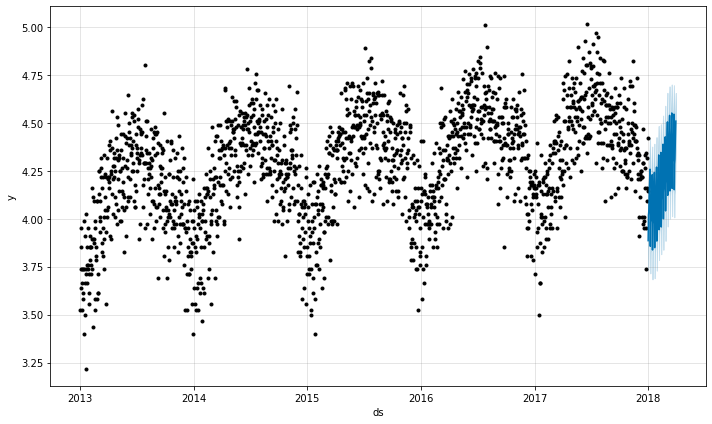

In [ ]:
forecastplot = model.plot(forecast)

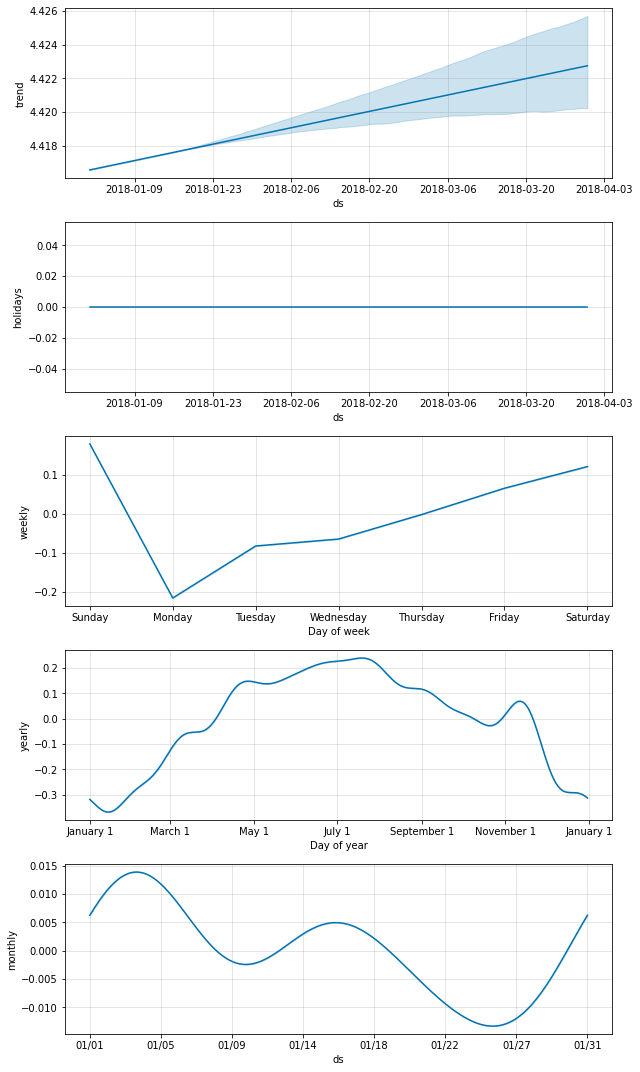

In [ ]:
fig = model.plot_components(forecast)

## Ensembling Experiments (After Tuning)


> The improved catboost and Prophet models showed improvement to forecasting accuracy (observed in Experiment 6) - especially with a custom ratio of weighted average (60% catboost 40% prophet instead of 50-50 in Experiment 9). From ensembled learning before tuning, rounded sales figures showed better SMAPE scores, which is also applied for all experiments below. Experiment 10 showed that the ensembling of all 5 models did not produce the best result, possibly due to higher inaccuracies in forecasting for the pre-tuned models.



In [ ]:
import pandas as pd
df1_1 = pd.read_csv("/content/submission_catboost.csv")
df1_2 = pd.read_csv("/content/submission_catboost_2.csv")
df1_3 = pd.read_csv("/content/submission_catboost_3.csv")
df2_1 = pd.read_csv("/content/submission_prophet_1.csv")
df2_2 = pd.read_csv("/content/submission_prophet_2.csv")

exp_df = df1_1 # make a duplicate for experiments

Experiment 5

In [ ]:
exp_df['sales'] = (0.6*df1_1['sales']) + (0.4*df2_1['sales'])
exp_df.to_csv('/content/submission_ens5.csv', index=False)
exp_df

,id,sales
0,0,12.082122
1,1,14.268432
2,2,14.571210
3,3,15.012999
4,4,16.650520
...,...,...
44995,44995,69.836554
44996,44996,71.387914
44997,44997,76.723819
44998,44998,81.459730


In [ ]:
exp_df_rounded = exp_df
exp_df_rounded['sales'] = np.round(exp_df_rounded['sales']).astype(int) # round the result to whole number
exp_df_rounded.to_csv('/content/submission_ens5_rounded.csv', index=False)
exp_df_rounded

,id,sales
0,0,12
1,1,14
2,2,15
3,3,15
4,4,17
...,...,...
44995,44995,70
44996,44996,71
44997,44997,77
44998,44998,81


Experiment 6 - BEST

In [ ]:
exp_df['sales'] = (0.6*df1_2['sales']) + (0.4*df2_2['sales'])
exp_df

,id,sales
0,0,12.136106
1,1,14.095992
2,2,14.373723
3,3,14.830201
4,4,16.564332
...,...,...
44995,44995,69.745146
44996,44996,71.116502
44997,44997,76.547201
44998,44998,81.337132


In [ ]:
exp_df_rounded = exp_df
exp_df_rounded['sales'] = np.round(exp_df_rounded['sales']).astype(int)
exp_df.to_csv('/content/submission_ens6_rounded-2.csv', index=False)
exp_df_rounded

,id,sales
0,0,12
1,1,14
2,2,14
3,3,15
4,4,17
...,...,...
44995,44995,70
44996,44996,71
44997,44997,77
44998,44998,81


Experiment 7 - SECOND BEST

In [ ]:
exp_df['sales'] = (0.6*df1_2['sales']) + (0.4*df2_1['sales'])
exp_df

,id,sales
0,0,12.076168
1,1,14.137997
2,2,14.487517
3,3,14.936580
4,4,16.727825
...,...,...
44995,44995,69.763699
44996,44996,71.541559
44997,44997,76.943175
44998,44998,81.410528


In [ ]:
exp_df_rounded = exp_df
exp_df_rounded['sales'] = np.round(exp_df_rounded['sales']).astype(int) # round the result to whole number
exp_df.to_csv('/content/submission_ens7_rounded_v2.csv', index=False)
exp_df_rounded

,id,sales
0,0,12
1,1,14
2,2,14
3,3,15
4,4,17
...,...,...
44995,44995,70
44996,44996,72
44997,44997,77
44998,44998,81


Experiment 8

In [ ]:
exp_df['sales'] = (0.6*df1_3['sales']) + (0.4*df2_1['sales'])
exp_df

,id,sales
0,0,12.385574
1,1,14.716202
2,2,15.084407
3,3,15.487217
4,4,16.361156
...,...,...
44995,44995,69.519644
44996,44996,71.472747
44997,44997,77.066711
44998,44998,81.254488


In [ ]:
exp_df_rounded = exp_df
exp_df_rounded['sales'] = np.round(exp_df_rounded['sales']).astype(int) # round the result to whole number
exp_df_rounded.to_csv('/content/submission_ens8_rounded.csv', index=False)
exp_df_rounded

,id,sales
0,0,12
1,1,15
2,2,15
3,3,15
4,4,16
...,...,...
44995,44995,70
44996,44996,71
44997,44997,77
44998,44998,81


Experiment 9

In [ ]:
exp_df['sales'] = (0.5*df1_2['sales']) + (0.5*df2_2['sales'])
exp_df

,id,sales
0,0,12.172954
1,1,14.133684
2,2,14.449109
3,3,14.925941
4,4,16.585287
...,...,...
44995,44995,70.057889
44996,44996,71.447107
44997,44997,76.824694
44998,44998,81.822079


In [ ]:
import numpy as np
exp_df_rounded = exp_df
exp_df_rounded['sales'] = np.round(exp_df_rounded['sales']).astype(int) # round the result to whole number
exp_df_rounded.to_csv('/content/submission_ens9_rounded.csv', index=False)
exp_df_rounded

,id,sales
0,0,12
1,1,14
2,2,14
3,3,15
4,4,17
...,...,...
44995,44995,70
44996,44996,71
44997,44997,77
44998,44998,82


Experiment 10

In [ ]:
exp_df['sales'] = (0.45*((df1_1['sales']+df1_2['sales']+df1_3['sales'])/3)) + (0.55*(((0.5*df2_1['sales'])+(0.5*df2_2['sales']))))
exp_df

,id,sales
0,0,12.230499
1,1,14.391178
2,2,14.756104
3,3,15.222814
4,4,16.577846
...,...,...
44995,44995,70.202429
44996,44996,71.810611
44997,44997,77.156878
44998,44998,82.100603


In [ ]:
exp_df_rounded = exp_df
exp_df_rounded['sales'] = np.round(exp_df_rounded['sales']).astype(int) # round the result to whole number
exp_df_rounded.to_csv('/content/submission_ens10_rounded.csv', index=False)
exp_df_rounded

,id,sales
0,0,12
1,1,14
2,2,15
3,3,15
4,4,17
...,...,...
44995,44995,70
44996,44996,72
44997,44997,77
44998,44998,82
